In [1]:
!hostname

n133.clstr


In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

import xarray as xr
import os
import glob
import geopandas as gpd
import pandas as pd
import numpy as np
import re
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr

In [2]:
shapefile_path = "/center1/DYNDOWN/phutton5/ROS/boundaries/Alaska_Borough_and_Census_Area_Boundaries.shp"
borough_boundaries = gpd.read_file(shapefile_path)
borough_boundaries = borough_boundaries.set_crs(epsg=3338)
borough_boundaries = borough_boundaries.to_crs(epsg=4326)
FNSB_boundary = borough_boundaries[borough_boundaries['CommunityN'] == 'Fairbanks North Star Borough']
FNSB_geom = FNSB_boundary.geometry.iloc[0] 
FNSB_coords = []
FNSB_coords.extend(list(FNSB_geom.exterior.coords))
FNSB_coords = np.array(FNSB_coords)  
FNSB_coords = pd.DataFrame({
    "lon": FNSB_coords[:, 0],
    "lat": FNSB_coords[:, 1]
})

Fairbanks_lat=(64.84)
Fairbanks_lon=(-147.72)

'''
borough_name = 'Municipality of Anchorage'
Mun_Anc_boundary = borough_boundaries[borough_boundaries['CommunityN'] == borough_name]
ANC_geom = Mun_Anc_boundary.geometry.iloc[0] 
ANC_coords = []
ANC_coords.extend(list(ANC_geom.exterior.coords))
ANC_coords = np.array(ANC_coords)  
ANC_coords = pd.DataFrame({
    "lon": ANC_coords[:, 0],
    "lat": ANC_coords[:, 1]
})
'''


'\nborough_name = \'Municipality of Anchorage\'\nMun_Anc_boundary = borough_boundaries[borough_boundaries[\'CommunityN\'] == borough_name]\nANC_geom = Mun_Anc_boundary.geometry.iloc[0] \nANC_coords = []\nANC_coords.extend(list(ANC_geom.exterior.coords))\nANC_coords = np.array(ANC_coords)  \nANC_coords = pd.DataFrame({\n    "lon": ANC_coords[:, 0],\n    "lat": ANC_coords[:, 1]\n})\n'

In [3]:
path='/center1/DYNDOWN/phutton5/ROS/Raw_ERA5/Raw_ERA5_netcdf'
pattern=f'Raw*.nc'
file_list = sorted(glob.glob(os.path.join(path, pattern)))
data = xr.open_mfdataset(file_list, combine='by_coords',engine='netcdf4')
#data = data.fillna(0)

seasons=data['season']
lat=data['latitude']
lon=data['longitude']

In [4]:
data

<xarray.Dataset> Size: 1GB
Dimensions:              (season: 146, month: 5, latitude: 68, longitude: 190,
                          borough: 30)
Coordinates:
  * season               (season) <U21 12kB '1950-1951' '1951-1952' ... '72'
  * month                (month) int64 40B 11 12 1 2 3
  * latitude             (latitude) float32 272B 72.0 71.75 71.5 ... 55.5 55.25
  * longitude            (longitude) float32 760B -176.0 -175.8 ... -128.8
    month_name           (month) <U3 60B dask.array<chunksize=(5,), meta=np.ndarray>
  * borough              (borough) <U33 4kB 'Aleutians East Borough' ... 'Yuk...
Data variables: (12/22)
    ros_tally            (season, month, latitude, longitude) float64 75MB dask.array<chunksize=(1, 5, 68, 190), meta=np.ndarray>
    ros_counts           (season, month, latitude, longitude) float64 75MB dask.array<chunksize=(1, 5, 68, 190), meta=np.ndarray>
    ros_days_count       (season, month, latitude, longitude) float64 75MB dask.array<chunksize=(1, 5, 68, 190), meta=np.ndarray>
    rain_sum             (season, month, latitude, longitude) float64 75MB dask.array<chunksize=(1, 5, 68, 190), meta=np.ndarray>
    rain_ros_sum         (season, month, latitude, longitude) float64 75MB dask.array<chunksize=(1, 5, 68, 190), meta=np.ndarray>
    rain_avg             (season, month, latitude, longitude) float64 75MB dask.array<chunksize=(1, 5, 68, 190), meta=np.ndarray>
    ...                   ...
    sumtotal_precip_ros  (season, month, latitude, longitude) float64 75MB dask.array<chunksize=(1, 5, 68, 190), meta=np.ndarray>
    avgtotal_precip      (season, month, latitude, longitude) float64 75MB dask.array<chunksize=(1, 5, 68, 190), meta=np.ndarray>
    avgtotal_precip_ros  (season, month, latitude, longitude) float64 75MB dask.array<chunksize=(1, 5, 68, 190), meta=np.ndarray>
    total_ros_hours      (borough, season) float64 35kB dask.array<chunksize=(30, 73), meta=np.ndarray>
    n_pixels             (borough, season) float64 35kB dask.array<chunksize=(30, 73), meta=np.ndarray>
    normalized           (borough, season) float64 35kB dask.array<chunksize=(30, 73), meta=np.ndarray>

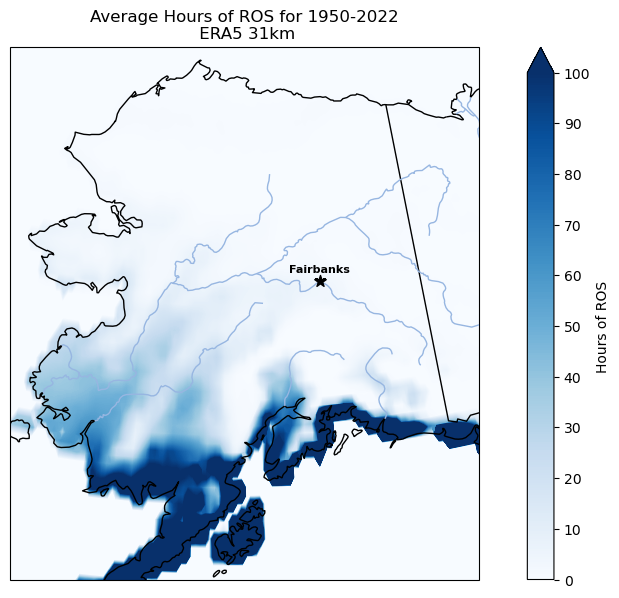

In [77]:
season_sums = data['ros_tally'].sum(dim='month')
seasonal_averageROS_Hrs = season_sums.mean(dim='season')

AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
cmap = plt.get_cmap('Blues')
levels=np.linspace(0,100,200)
#levels=np.arange(0, 110,10)
fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10,6))
cf = ax.contourf(lon, lat,seasonal_averageROS_Hrs, cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='Hours of ROS', ticks=np.arange(0, 110,10))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=10, s=75,label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=10, fontweight='bold', color='black')
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_title("Average Hours of ROS for 1950-2022\n ERA5 31km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show() 

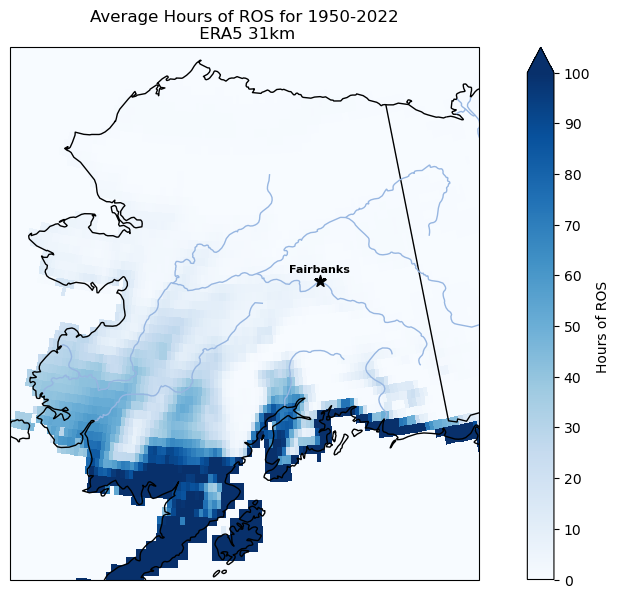

In [78]:
fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10,6))

vmin, vmax = 0, 100
cmap = plt.get_cmap('Blues')

pcm = ax.pcolormesh(
    lon, lat, seasonal_averageROS_Hrs,
    cmap=cmap, vmin=vmin, vmax=vmax,
    transform=ccrs.PlateCarree(),
    shading='auto'  
)

cbar = fig.colorbar(pcm, ax=ax, label='Hours of ROS', ticks=np.arange(0, 110, 10),extend='max' )
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=10, s=75,
           label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=10, fontweight='bold', color='black')
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_title("Average Hours of ROS for 1950-2022\n ERA5 31km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show()


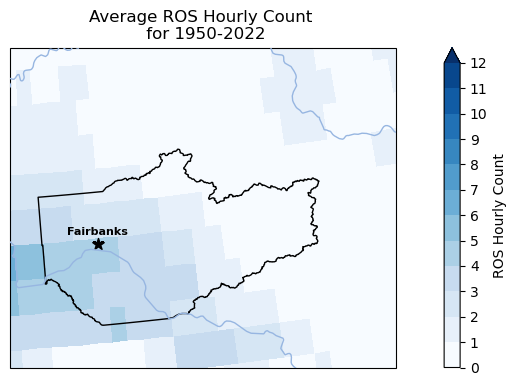

In [79]:
season_sums = data['ros_tally'].sum(dim='month')
seasonal_averageROS_Hrs = season_sums.mean(dim='season')

AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}

cmap = plt.get_cmap('Blues')
norm = mcolors.BoundaryNorm(boundaries=np.arange(0, 13, 1), ncolors=cmap.N, extend='max')

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))

mesh = ax.pcolormesh(
    lon, lat, seasonal_averageROS_Hrs,
    cmap=cmap,
    norm=norm,
    shading='auto',
    transform=ccrs.PlateCarree()
)

cbar = fig.colorbar(mesh, ax=ax, label='ROS Hourly Count', extend='max')
cbar.set_ticks(np.arange(0, 13, 1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

FNSB_boundary.plot(
    ax=ax, facecolor='none', edgecolor='black',
    linewidth=1, zorder=2, transform=ccrs.PlateCarree()
)
ax.scatter(
    Fairbanks_lon, Fairbanks_lat,
    marker='*', color='k', zorder=5, s=75,
    label='Fairbanks', transform=ccrs.PlateCarree()
)
ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks', transform=ccrs.PlateCarree(), ha='center', va='bottom', fontsize=8,zorder=6, fontweight='bold', color='black'
)

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title("Average ROS Hourly Count \n for 1950-2022")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


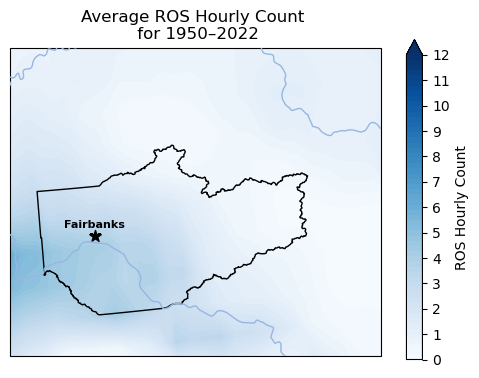

In [80]:
season_sums = data['ros_tally'].sum(dim='month')
seasonal_averageROS_Hrs = season_sums.mean(dim='season')

AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
levels = np.linspace(0, 12,60)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
cf = ax.contourf(lon, lat, seasonal_averageROS_Hrs, levels=levels,extend='max',cmap='Blues',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='ROS Hourly Count')
cbar.set_ticks(np.arange(0,13,1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])
FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)
ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks', transform=ccrs.PlateCarree(),
        ha='center', va='bottom', fontsize=8, zorder=6, fontweight='bold', color='black')

ax.set_title("Average ROS Hourly Count \n for 1950–2022")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree()) 
ax.set_aspect('equal') 
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

In [81]:
averageROS_Hrs=np.mean(data['ros_tally'],axis=(0))

In [82]:
averageROS_Counts_Hrs=np.nanmean(data['ros_counts'],axis=(0,1))

In [83]:
print(data['ros_tally'].month.values)

[11 12  1  2  3]


In [71]:
nov_ros_tally_avg=data['ros_tally'].sel(month=11).mean(dim='season')
dec_ros_tally_avg=data['ros_tally'].sel(month=12).mean(dim='season')
jan_ros_tally_avg=data['ros_tally'].sel(month=1).mean(dim='season')
feb_ros_tally_avg=data['ros_tally'].sel(month=2).mean(dim='season')
mar_ros_tally_avg=data['ros_tally'].sel(month=3).mean(dim='season')

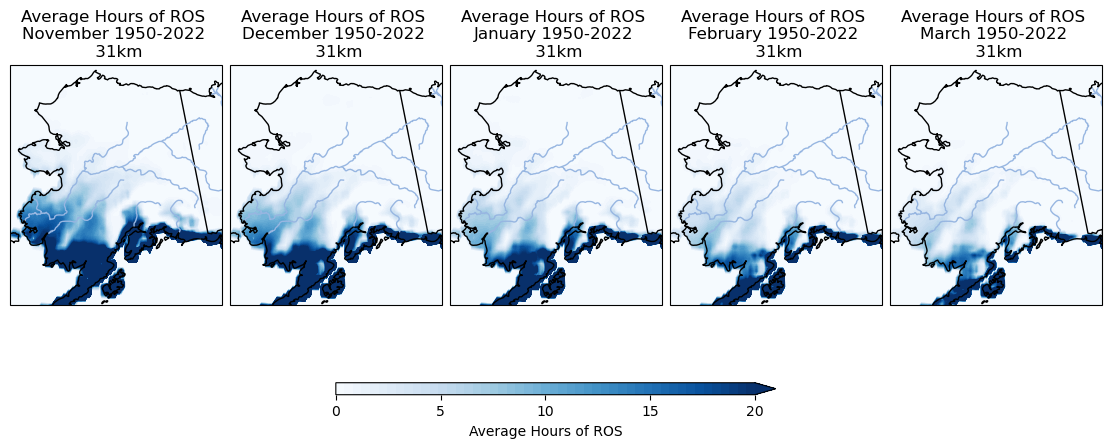

In [72]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(11,6), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

#fig.suptitle("Average Days of ROS", y=0.9)
#levels = np.arange(0, 11, 1) 
levels=np.linspace(0,20,50)

cf1 = axs[0].contourf(lon, lat, nov_ros_tally_avg, levels=levels, cmap='Blues', extend='max', transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \nNovember 1950-2022 \n 31km")

cf2 = axs[1].contourf(lon, lat, dec_ros_tally_avg, levels=levels, cmap='Blues', extend='max', transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \nDecember 1950-2022 \n 31km")

cf3 = axs[2].contourf(lon, lat, jan_ros_tally_avg, levels=levels, cmap='Blues', extend='max', transform=ccrs.PlateCarree())
axs[2].set_title("Average Hours of ROS \nJanuary 1950-2022 \n 31km")

cf4 = axs[3].contourf(lon, lat, feb_ros_tally_avg, levels=levels, cmap='Blues', extend='max', transform=ccrs.PlateCarree())
axs[3].set_title("Average Hours of ROS \nFebruary 1950-2022 \n 31km")
    
cf5 = axs[4].contourf(lon, lat, mar_ros_tally_avg, levels=levels, cmap='Blues', extend='max', transform=ccrs.PlateCarree())
axs[4].set_title("Average Hours of ROS \nMarch 1950-2022 \n 31km")

for ax in axs:
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(cf1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 25, 5))

fig.patch.set_alpha(0.0)
plt.show()

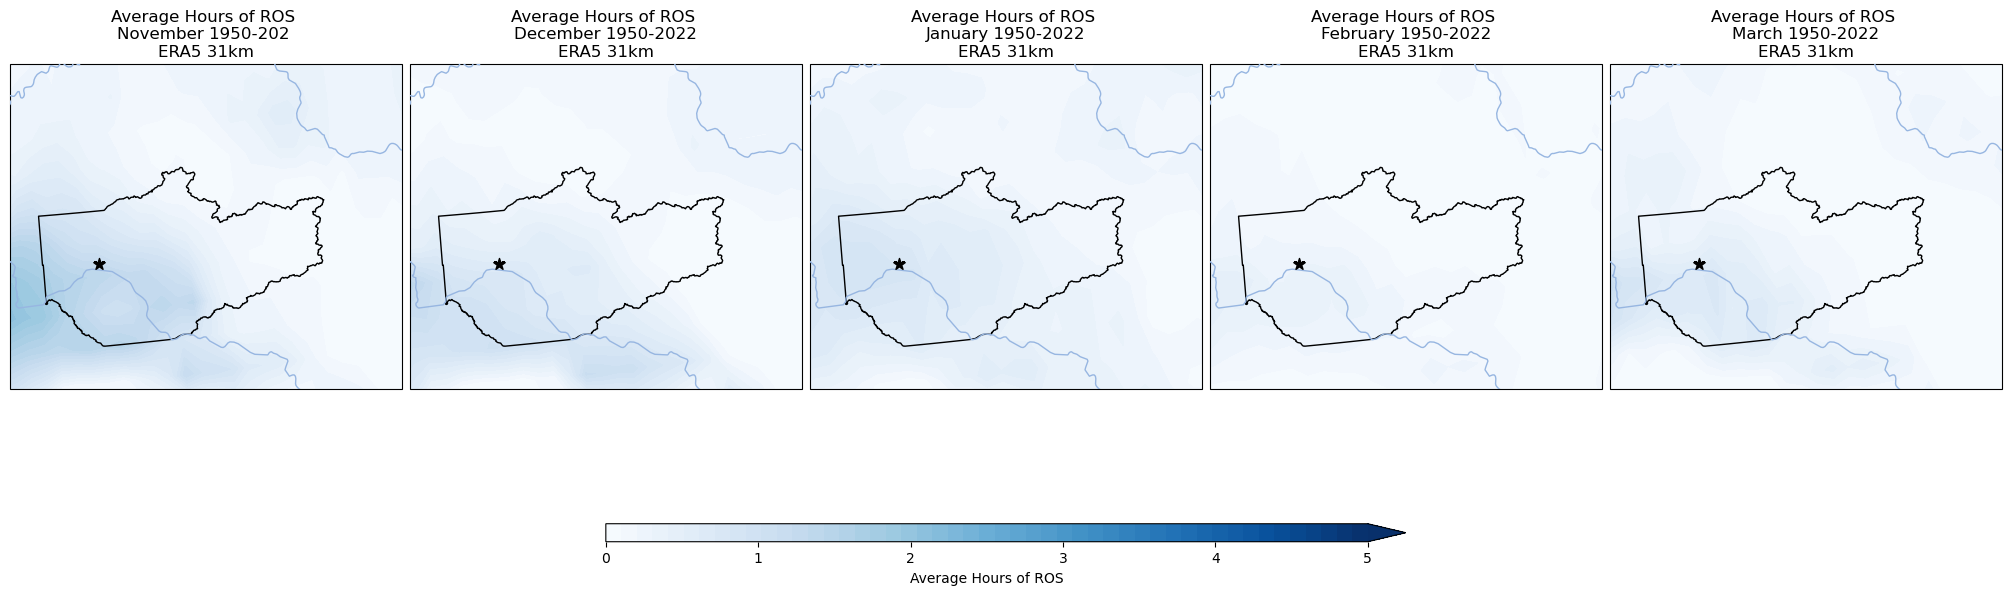

In [73]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

#fig.suptitle("Average Days of ROS", y=0.9)
#levels = np.arange(0, 11, 1) 
levels=np.linspace(0,5,50)

cf1 = axs[0].contourf(lon, lat, nov_ros_tally_avg, levels=levels, cmap='Blues', extend='max', transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \nNovember 1950-202 \nERA5 31km")

cf2 = axs[1].contourf(lon, lat, dec_ros_tally_avg, levels=levels, cmap='Blues', extend='max', transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \nDecember 1950-2022\nERA5 31km")

cf3 = axs[2].contourf(lon, lat, jan_ros_tally_avg, levels=levels, cmap='Blues', extend='max', transform=ccrs.PlateCarree())
axs[2].set_title("Average Hours of ROS \nJanuary 1950-2022\nERA5 31km")

cf4 = axs[3].contourf(lon, lat, feb_ros_tally_avg, levels=levels, cmap='Blues', extend='max', transform=ccrs.PlateCarree())
axs[3].set_title("Average Hours of ROS \nFebruary 1950-2022\nERA5 31km")
    
cf5 = axs[4].contourf(lon, lat, mar_ros_tally_avg, levels=levels, cmap='Blues', extend='max', transform=ccrs.PlateCarree())
axs[4].set_title("Average Hours of ROS \nMarch 1950-2022\nERA5 31km")

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8,) 
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(cf1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 6, 1))

fig.patch.set_alpha(0.0)
plt.show()

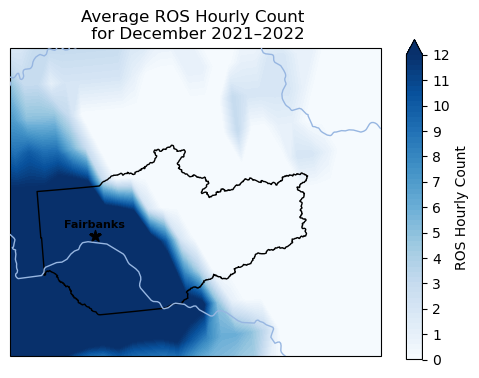

In [84]:
december_data = data['ros_tally'].sel(month=12, season='2021-2022')

AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
levels = np.linspace(0, 12,60)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
cf = ax.contourf(lon, lat, december_data, levels=levels,extend='max',cmap='Blues',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='ROS Hourly Count')
cbar.set_ticks(np.arange(0,13,1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])
FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)
ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks', transform=ccrs.PlateCarree(),
        ha='center', va='bottom', fontsize=8, zorder=6, fontweight='bold', color='black')

ax.set_title("Average ROS Hourly Count \n for December 2021–2022")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree()) 
ax.set_aspect('equal') 
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

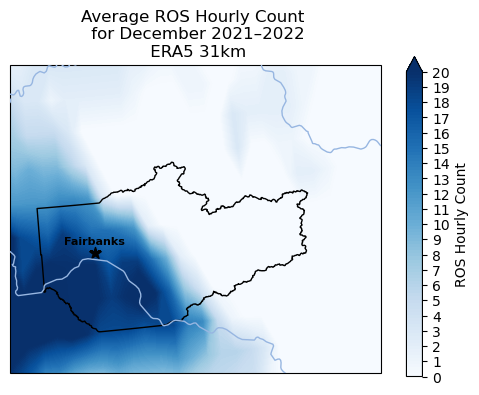

In [85]:
december_data = data['ros_tally'].sel(month=12, season='2021-2022')

AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
levels = np.linspace(0, 20,100)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
cf = ax.contourf(lon, lat, december_data, levels=levels,extend='max',cmap='Blues',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='ROS Hourly Count')
cbar.set_ticks(np.arange(0,21,1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])
FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)
ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks', transform=ccrs.PlateCarree(),
        ha='center', va='bottom', fontsize=8, zorder=6, fontweight='bold', color='black')

ax.set_title("Average ROS Hourly Count \n for December 2021–2022\n ERA5 31km")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree()) 
ax.set_aspect('equal') 
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

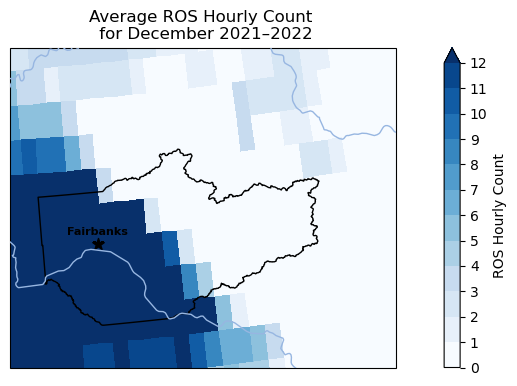

In [86]:

AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65)
    )
}
levels = np.arange(0, 13, 1)
cmap = plt.get_cmap('Blues')
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=cmap.N, extend='max')

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
mesh = ax.pcolormesh(
    lon, lat, december_data,
    cmap=cmap,
    norm=norm,
    shading='auto',
    transform=ccrs.PlateCarree()
)
cbar = fig.colorbar(mesh, ax=ax, label='ROS Hourly Count', extend='max')
cbar.set_ticks(np.arange(0, 13, 1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

FNSB_boundary.plot(
    ax=ax, facecolor='none', edgecolor='black',
    linewidth=1, zorder=2, transform=ccrs.PlateCarree()
)
ax.scatter(
    Fairbanks_lon, Fairbanks_lat,
    marker='*', color='k', zorder=5, s=75,
    label='Fairbanks', transform=ccrs.PlateCarree()
)
ax.text(
    Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks',
    transform=ccrs.PlateCarree(), ha='center', va='bottom',
    fontsize=8, zorder=6, fontweight='bold', color='black'
)

# Map features
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

# Extent and labels
ax.set_title("Average ROS Hourly Count \n for December 2021–2022")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()

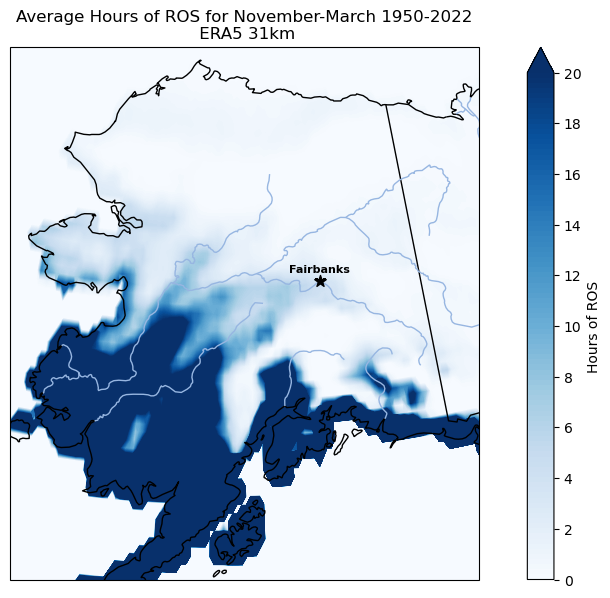

In [87]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
cmap = plt.get_cmap('Blues')
levels=np.linspace(0,20,100)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10,6))
cf = ax.contourf(lon, lat,seasonal_averageROS_Hrs, cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='Hours of ROS', ticks=np.arange(0,22,2))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=10, s=75,label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=10, fontweight='bold', color='black')
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_title("Average Hours of ROS for November-March 1950-2022\n ERA5 31km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show() 

/home/phutton5/miniconda3/envs/dyndown/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


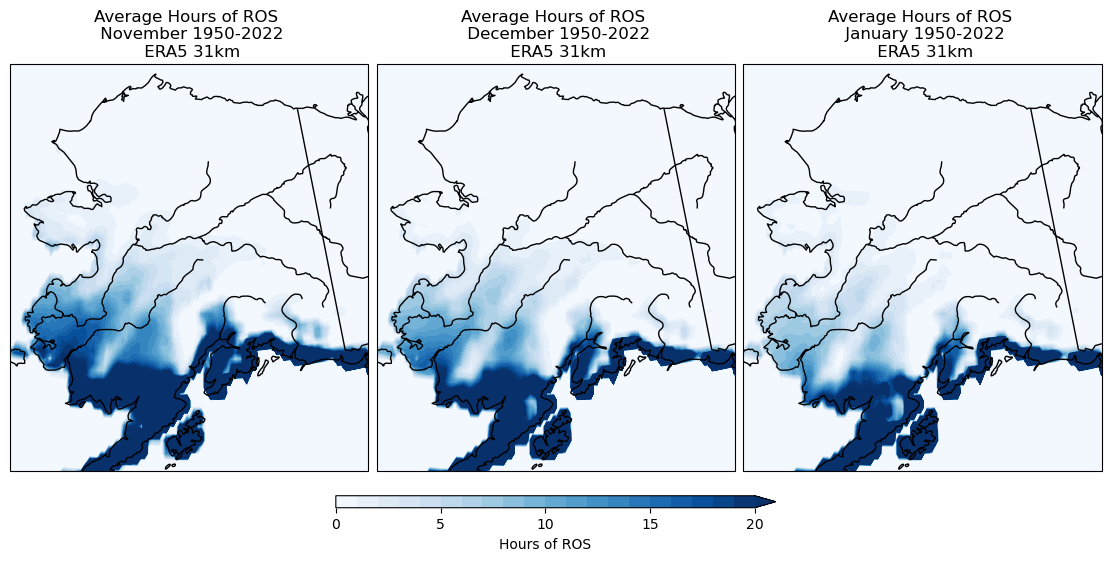

In [88]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,6), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)
cmap='Blues'
levels=np.arange(0,21,1)

cf1 = axs[0].contourf(lon, lat,data['ros_tally'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 31km")

cf2 = axs[1].contourf(lon, lat,data['ros_tally'].sel(month=12).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n December 1950-2022\n ERA5 31km")

cf3 = axs[2].contourf(lon, lat,data['ros_tally'].sel(month=1).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[2].set_title("Average Hours of ROS \n January 1950-2022\n ERA5 31km")

for ax in axs:
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8,color='black')
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(cf1,cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

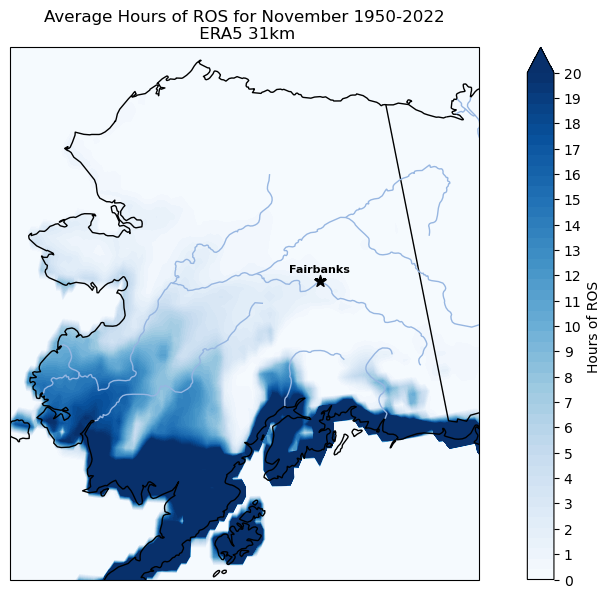

In [89]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
cmap = plt.get_cmap('Blues')
levels=np.linspace(0,20,50)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10,6))
cf = ax.contourf(lon, lat,data['ros_tally'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='Hours of ROS', ticks=np.arange(0, 21,1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=10, s=75,label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=10, fontweight='bold', color='black')
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_title("Average Hours of ROS for November 1950-2022\n ERA5 31km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show() 

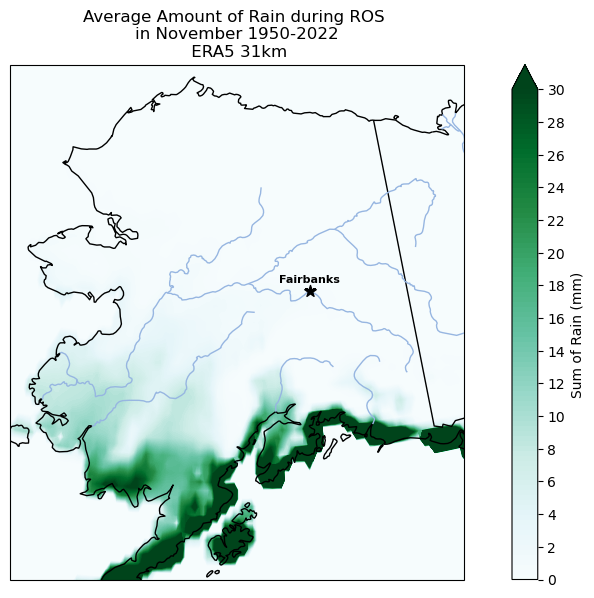

In [90]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
cmap = plt.get_cmap('BuGn')
levels=np.linspace(0,30,100)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10,6))
cf = ax.contourf(lon, lat,data['rain_ros_sum'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='Sum of Rain (mm)', ticks=np.arange(0, 31,1)[::2])
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)
ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=10, s=75,label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=10, fontweight='bold', color='black')
ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_title("Average Amount of Rain during ROS \nin November 1950-2022\n ERA5 31km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show() 

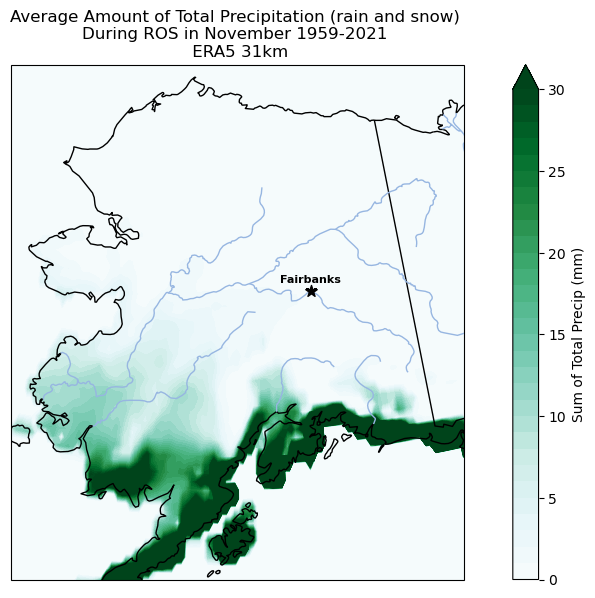

In [91]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
cmap = plt.get_cmap('BuGn')
levels=np.arange(0,31,1)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10,6))
cf = ax.contourf(lon, lat,data['sumtotal_precip_ros'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='Sum of Total Precip (mm)', ticks=levels[::5])
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)
ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=10, s=75,label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=10, fontweight='bold', color='black')
ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_title("Average Amount of Total Precipitation (rain and snow) \nDuring ROS in November 1959-2021 \n ERA5 31km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show() 

/home/phutton5/miniconda3/envs/dyndown/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


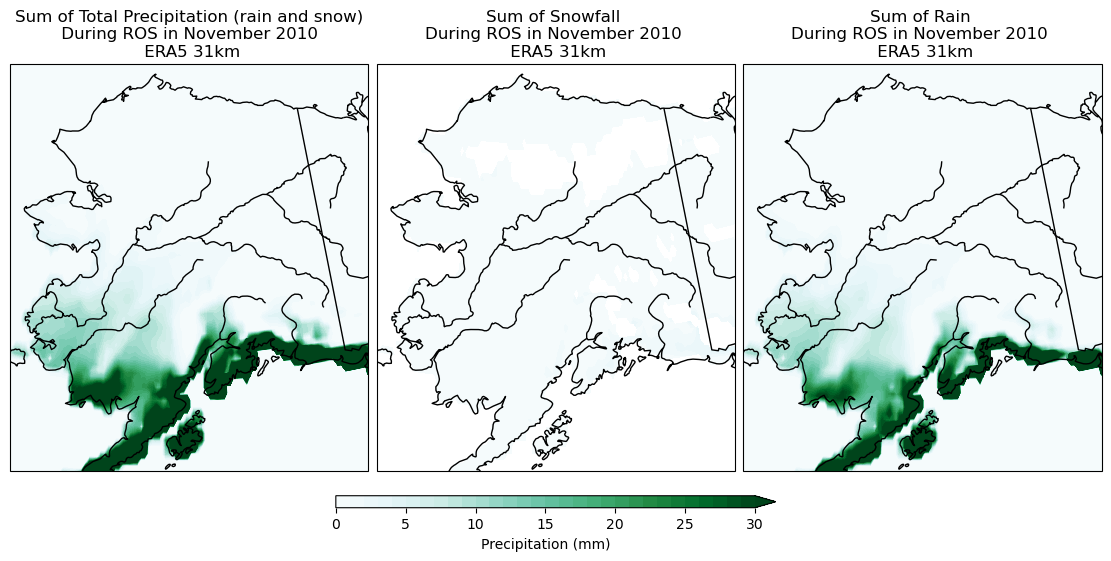

In [92]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,6), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)
cmap='BuGn'
levels=np.arange(0,31,1)

cf1 = axs[0].contourf(lon, lat,data['sumtotal_precip_ros'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Sum of Total Precipitation (rain and snow)\n During ROS in November 2010 \n ERA5 31km")

cf2 = axs[1].contourf(lon, lat,data['sf_ros_avg'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Sum of Snowfall \nDuring ROS in November 2010 \n ERA5 31km")

cf3 = axs[2].contourf(lon, lat,data['rain_ros_sum'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[2].set_title("Sum of Rain \nDuring ROS in November 2010 \n ERA5 31km")

for ax in axs:
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8,color='black')
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(cf1,cax=cbar_ax, orientation='horizontal', label='Precipitation (mm)', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

/home/phutton5/miniconda3/envs/dyndown/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


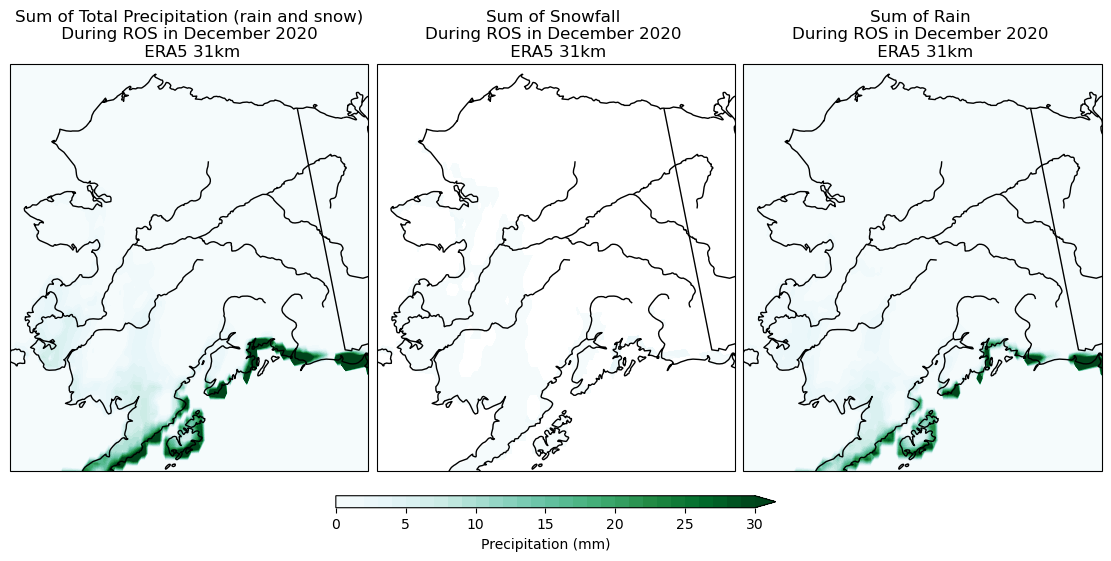

In [93]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,6), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)
cmap='BuGn'
levels=np.arange(0,31,1)

cf1 = axs[0].contourf(lon, lat,np.mean(data['sumtotal_precip_ros']['month'==1],axis=0), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Sum of Total Precipitation (rain and snow)\n During ROS in December 2020 \n ERA5 31km")

cf2 = axs[1].contourf(lon, lat,np.mean(data['sf_ros_avg']['month'==1],axis=0), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Sum of Snowfall \nDuring ROS in December 2020 \n ERA5 31km")

cf3 = axs[2].contourf(lon, lat,np.mean(data['rain_ros_sum']['month'==1],axis=0), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[2].set_title("Sum of Rain \nDuring ROS in December 2020 \n ERA5 31km")

for ax in axs:
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8,color='black')
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(cf1,cax=cbar_ax, orientation='horizontal', label='Precipitation (mm)', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

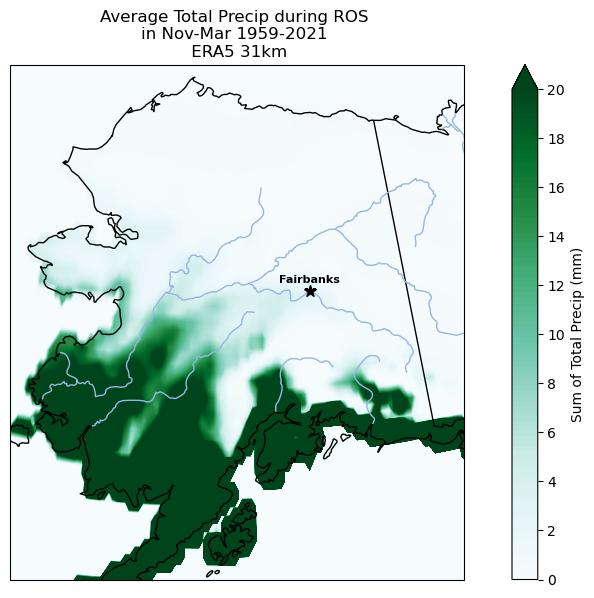

In [94]:
#data['sumtotal_precip_ros']
season_rainsums = data['sumtotal_precip_ros'].sum(dim='month')
seasonal_averageROS_rainsum = season_rainsums.mean(dim='season')

AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
cmap = plt.get_cmap('BuGn')
levels=np.linspace(0,20,100)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10,6))
cf = ax.contourf(lon, lat,seasonal_averageROS_rainsum, cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='Sum of Total Precip (mm)', ticks=np.arange(0, 21,1)[::2])
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)
ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=10, s=75,label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=10, fontweight='bold', color='black')
ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_title("Average Total Precip during ROS \nin Nov-Mar 1959-2021 \n ERA5 31km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show() 

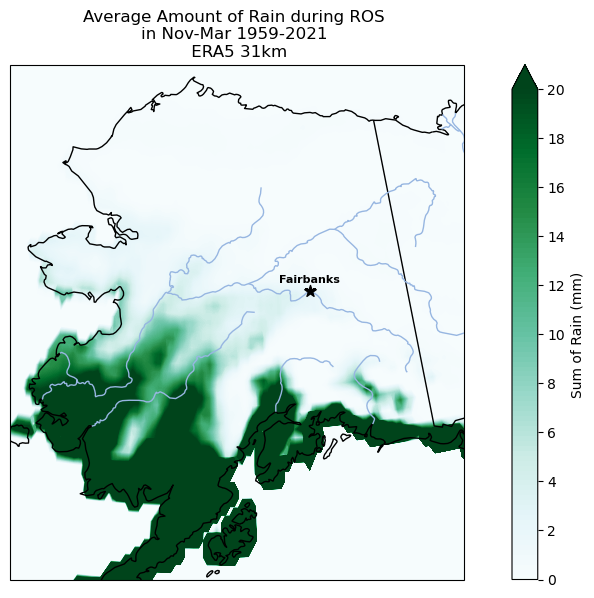

In [95]:
season_rainsums = data['rain_ros_sum'].sum(dim='month')
seasonal_averageROS_rainsum = season_rainsums.mean(dim='season')

AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
cmap = plt.get_cmap('BuGn')
levels=np.linspace(0,20,100)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10,6))
cf = ax.contourf(lon, lat,seasonal_averageROS_rainsum, cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='Sum of Rain (mm)', ticks=np.arange(0, 21,1)[::2])
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)
ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=10, s=75,label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=10, fontweight='bold', color='black')
ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_title("Average Amount of Rain during ROS \nin Nov-Mar 1959-2021 \n ERA5 31km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show() 

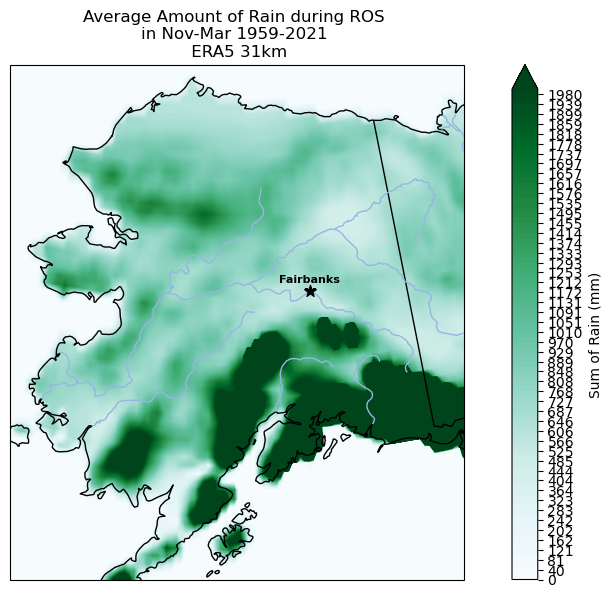

In [13]:
season_rainsums = data['swe_avg'].mean(dim='month')
seasonal_averageROS_rainsum = season_rainsums.mean(dim='season')

AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
cmap = plt.get_cmap('BuGn')
levels=np.linspace(0,2000,100)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10,6))
cf = ax.contourf(lon, lat,seasonal_averageROS_rainsum, cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='Sum of Rain (mm)', ticks=levels[::2])
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)
ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=10, s=75,label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=10, fontweight='bold', color='black')
ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_title("Average Amount of Rain during ROS \nin Nov-Mar 1959-2021 \n ERA5 31km")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show() 